# Read data from CCSM4 simulation

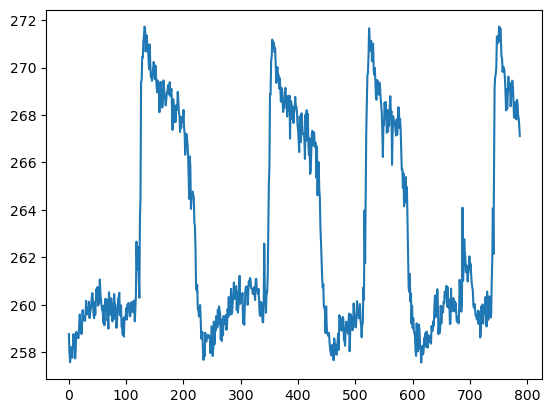

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/210.npy')
# plot TEMP using plt.plot
plt.plot(TEMP)


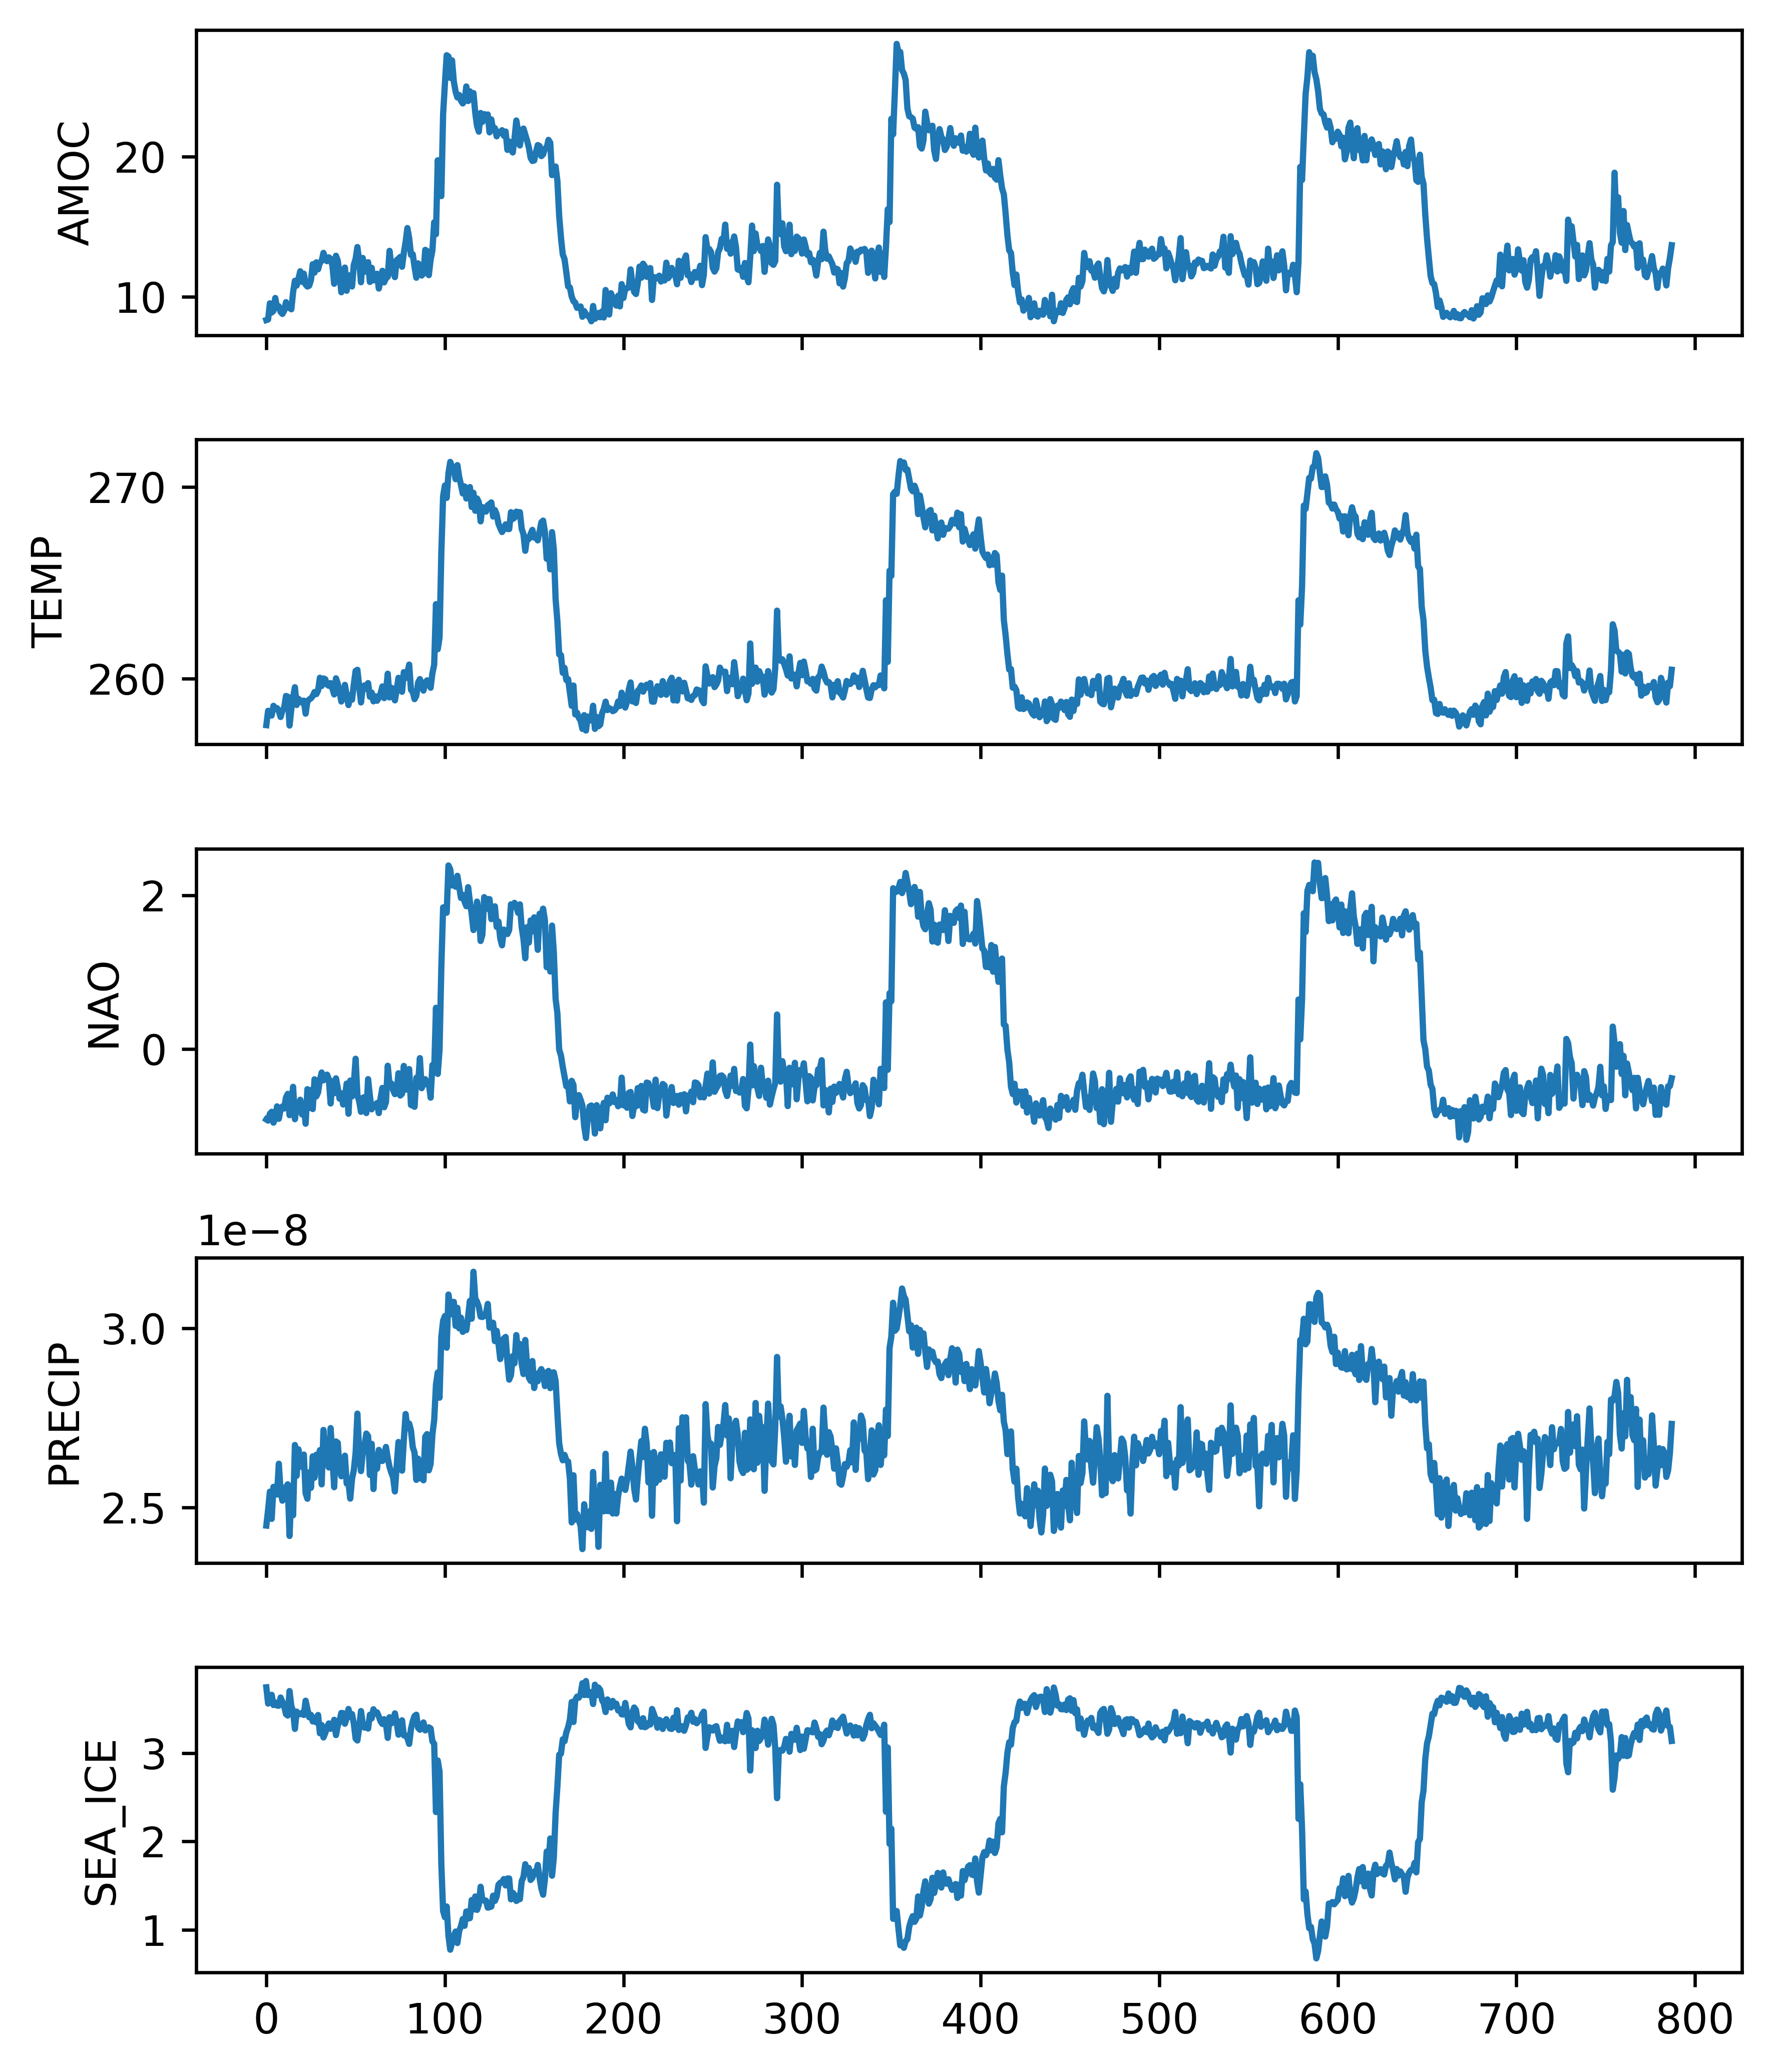

In [2]:

import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')
NAO = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/NAO/200.npy')
PRECIP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/PRECIP/200.npy')
SEA_ICE = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/SEA_ICE/200.npy')

# plot the data in 5 subplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(6, 7), sharex=True, dpi=600)
ax[0].plot(AMOC)
ax[0].set_ylabel('AMOC')
ax[1].plot(TEMP)
ax[1].set_ylabel('TEMP')
ax[2].plot(NAO)
ax[2].set_ylabel('NAO')
ax[3].plot(PRECIP)
ax[3].set_ylabel('PRECIP')
ax[4].plot(SEA_ICE)
ax[4].set_ylabel('SEA_ICE')
plt.tight_layout()

plt.show()


# DO the GC for all variables

In [3]:
import pandas as pd
df_all_vars= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE})
df_all_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     788 non-null    float32
 1   TEMP     788 non-null    float64
 2   NAO      788 non-null    float32
 3   PRECIP   788 non-null    float64
 4   SEA_ICE  788 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 21.7 KB


# Crop the data for the first 150 values

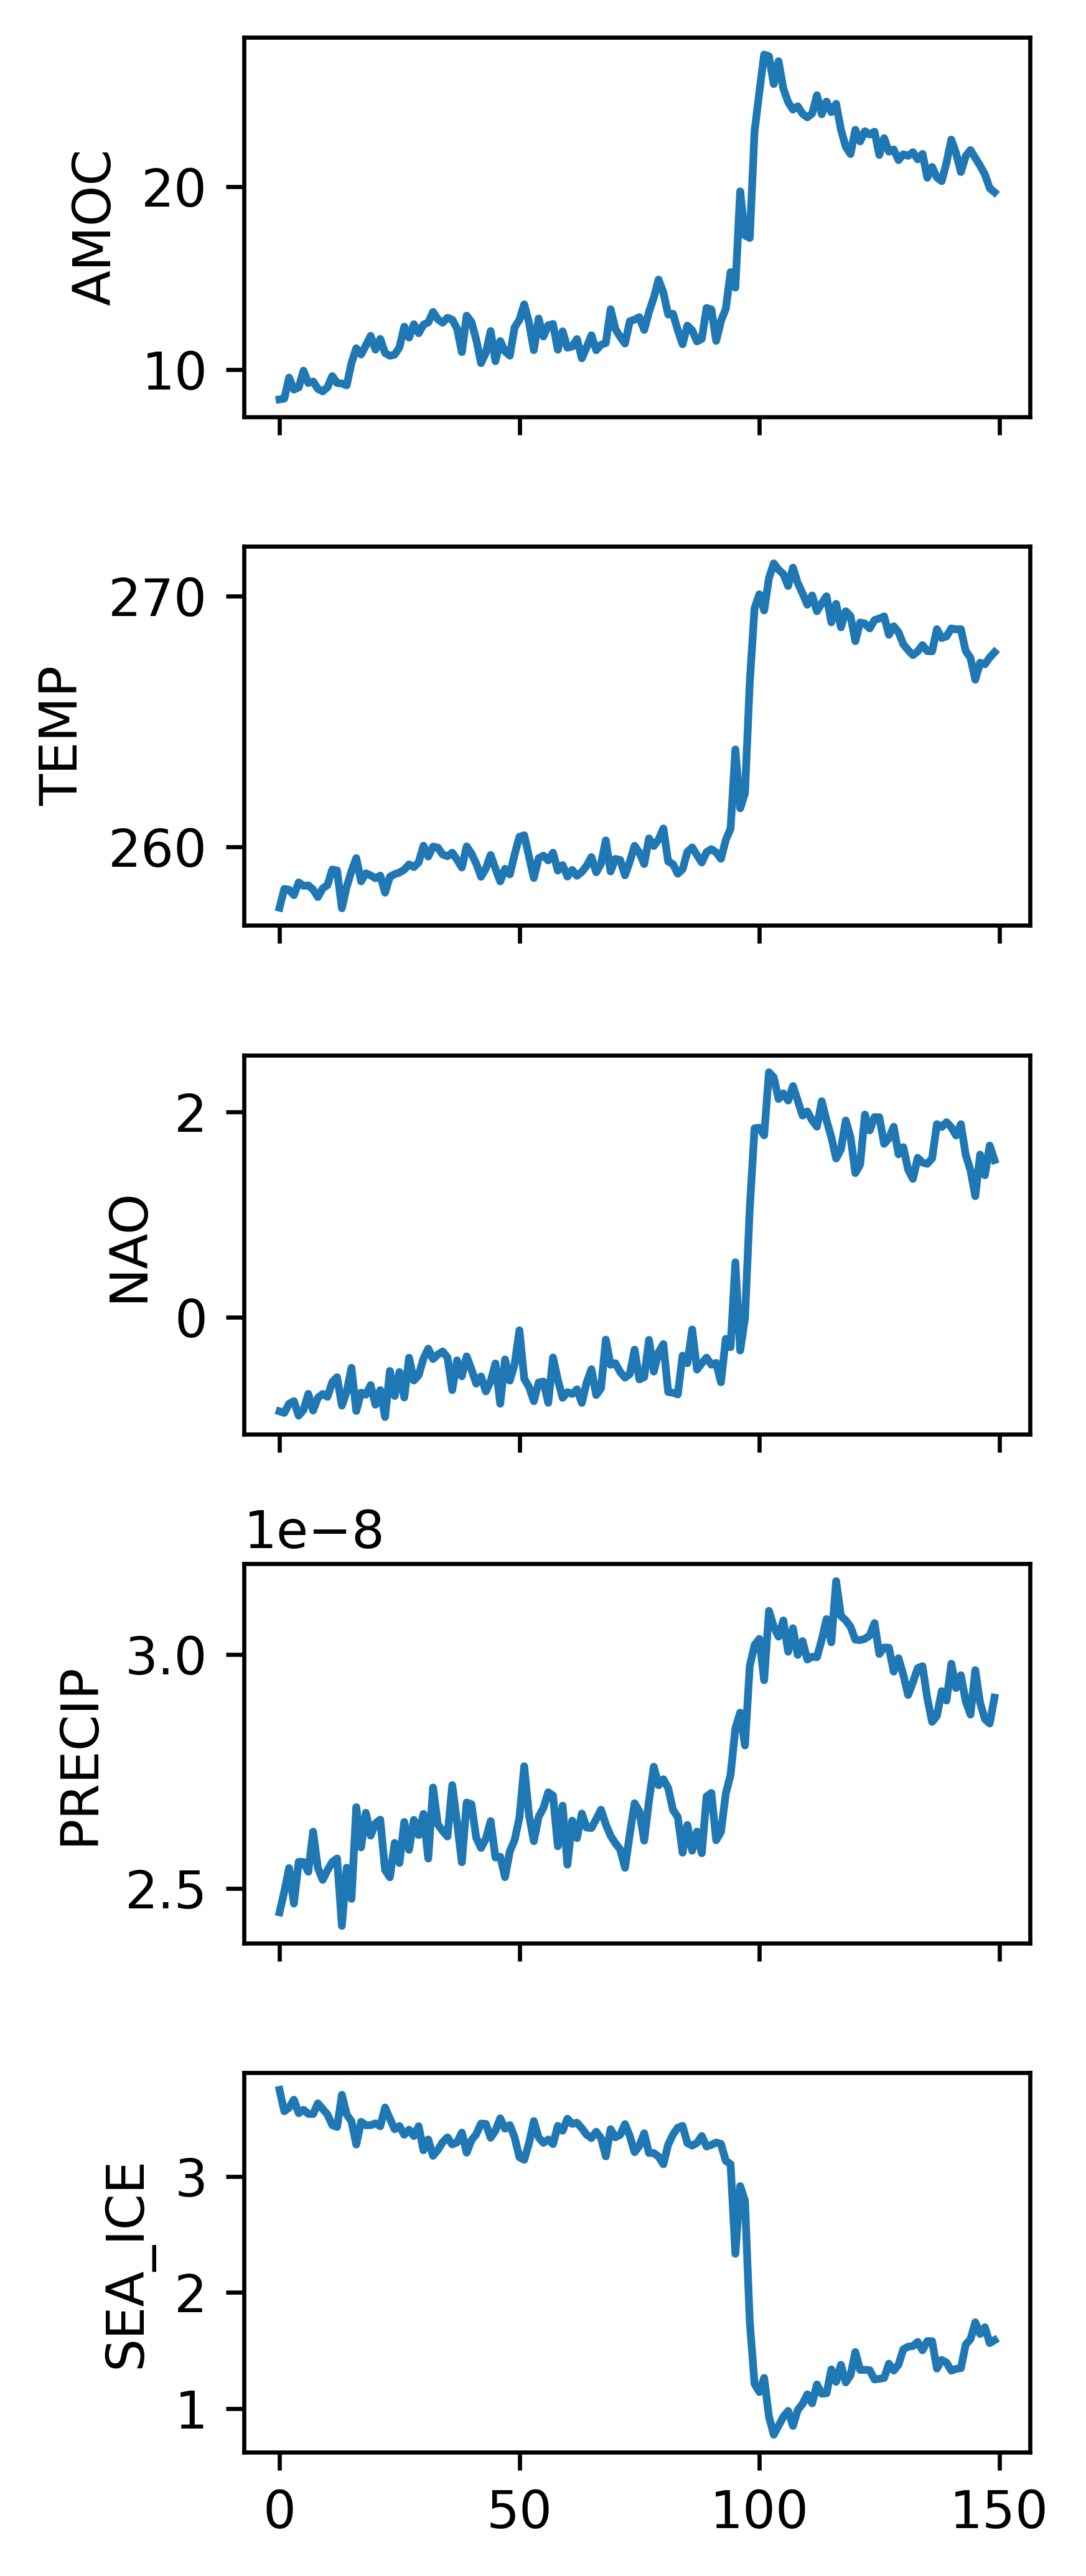

In [4]:
# crop the data for the first 150 values
df_all_vars = df_all_vars[:150]
# plot the data in 5 subplots
fig, ax = plt.subplots(5, 1, figsize=(3, 7), sharex=True, dpi=600)
ax[0].plot(df_all_vars['AMOC'])
ax[0].set_ylabel('AMOC')
ax[1].plot(df_all_vars['TEMP'])
ax[1].set_ylabel('TEMP')
ax[2].plot(df_all_vars['NAO'])
ax[2].set_ylabel('NAO')
ax[3].plot(df_all_vars['PRECIP'])
ax[3].set_ylabel('PRECIP')
ax[4].plot(df_all_vars['SEA_ICE'])
ax[4].set_ylabel('SEA_ICE')
plt.tight_layout()
plt.show()

# Check linearity

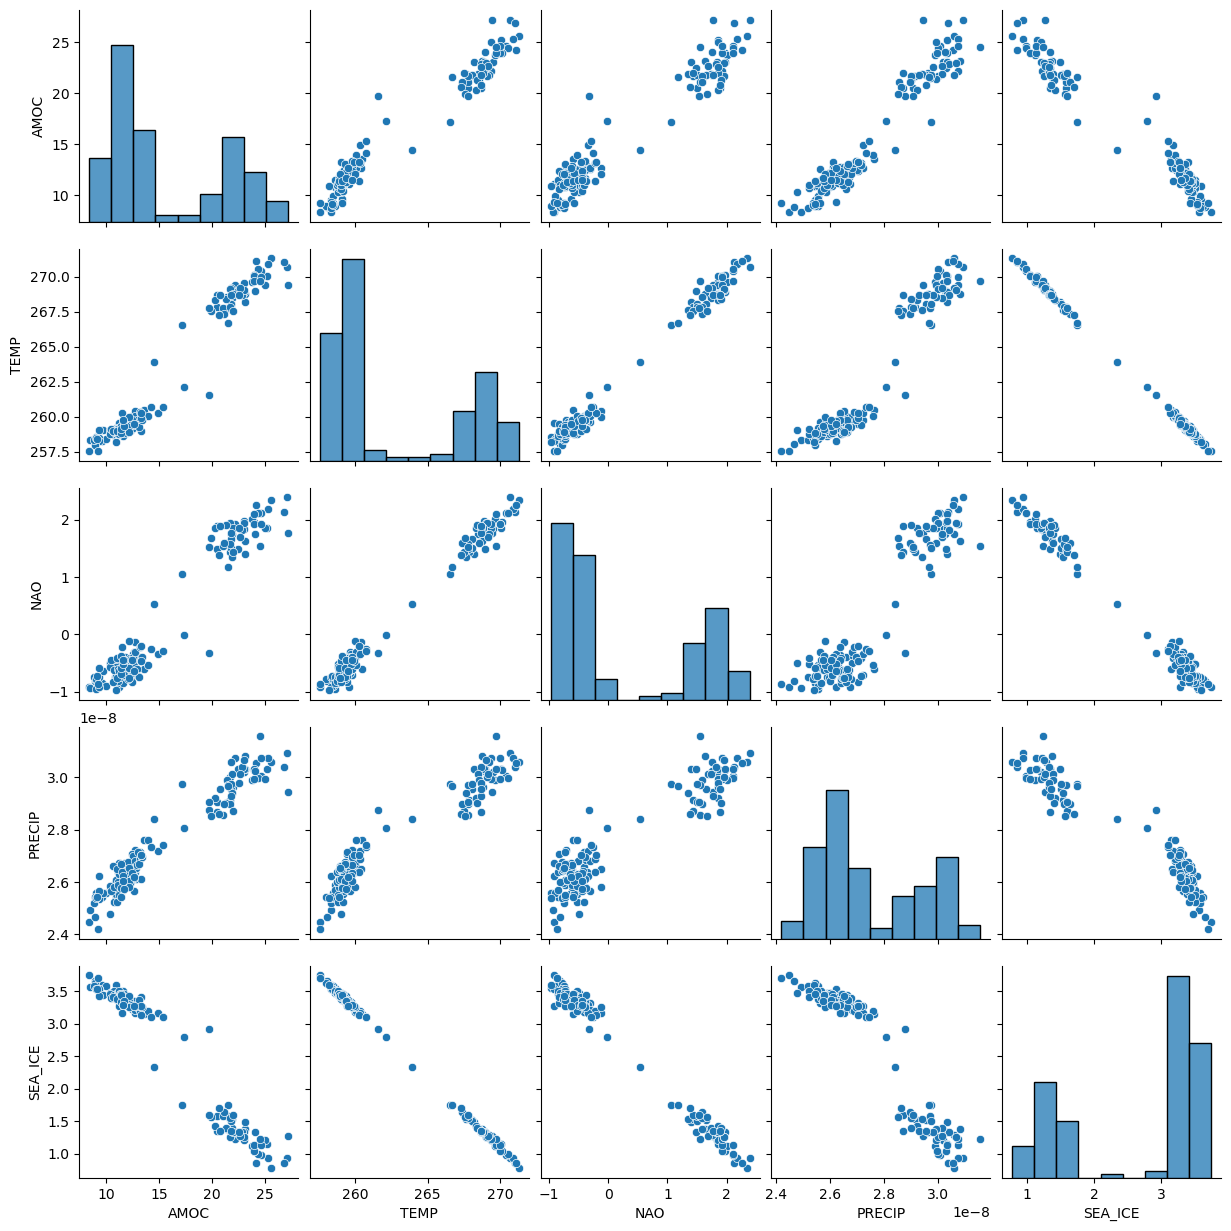

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a pairplot to visualize the scatter plot for each pair of variables
pair_plot =sns.pairplot(df_all_vars)
# plt.suptitle('Scatter plots for each pair of variables', y=1.02)
# plt.gcf().set_size_inches(12, 8)  # Width, Height in inches
plt.show()
pair_plot.savefig('pairplot_high_res.svg')


# Test stationarity

In [4]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

for column in df_all_vars.columns:
    is_stationary = GC.is_stationary(df_all_vars[column])
    print(f'The stationarity of {column} is {is_stationary}.')
    

ADF Statistic: -1.299813680420145
p-value: 0.6292575508042038
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of AMOC is False.
ADF Statistic: -1.2819465955303744
p-value: 0.6373907663613375
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.
The stationarity of TEMP is False.
ADF Statistic: -0.9552164137572907
p-value: 0.7692458301503794
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of NAO is False.
ADF Statistic: -1.612756730189127
p-value: 0.4765286499523702
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of PRECIP is False.
ADF Statistic: -1.3305129269225355
p-value: 0.6150996062389701
Critical Values:
	1%: -3.476597917537401
	5%: -2.881829123

# Make the data stationary

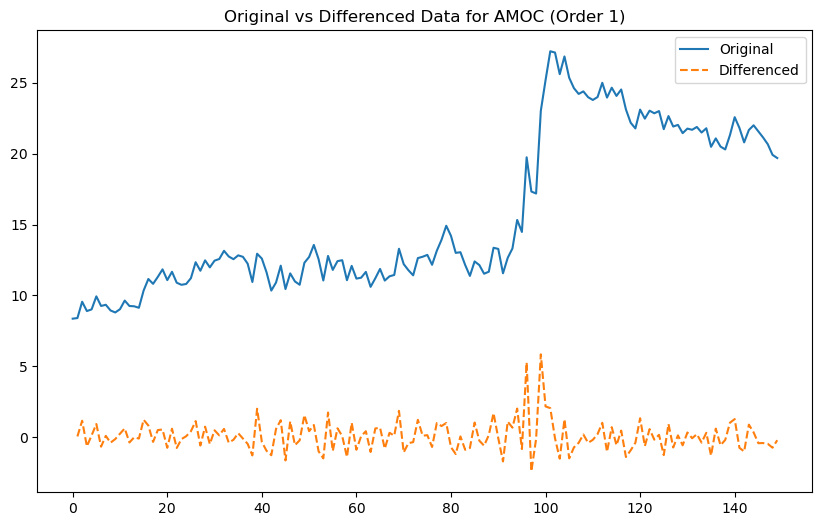

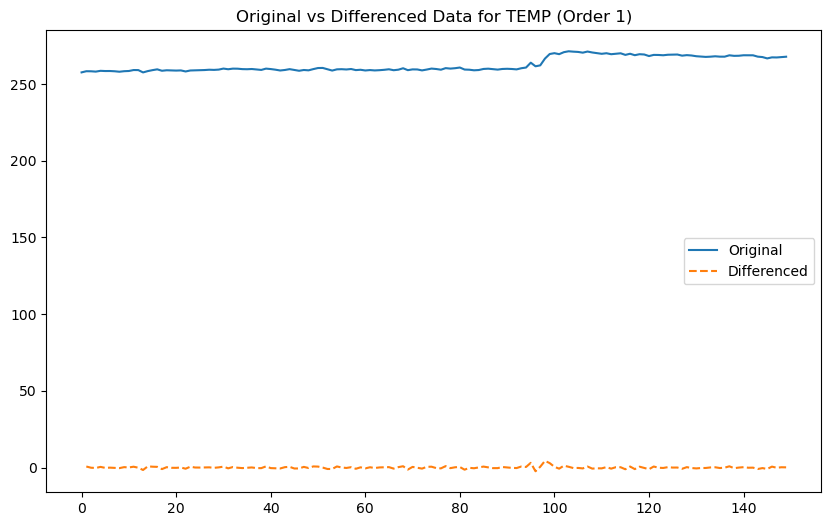

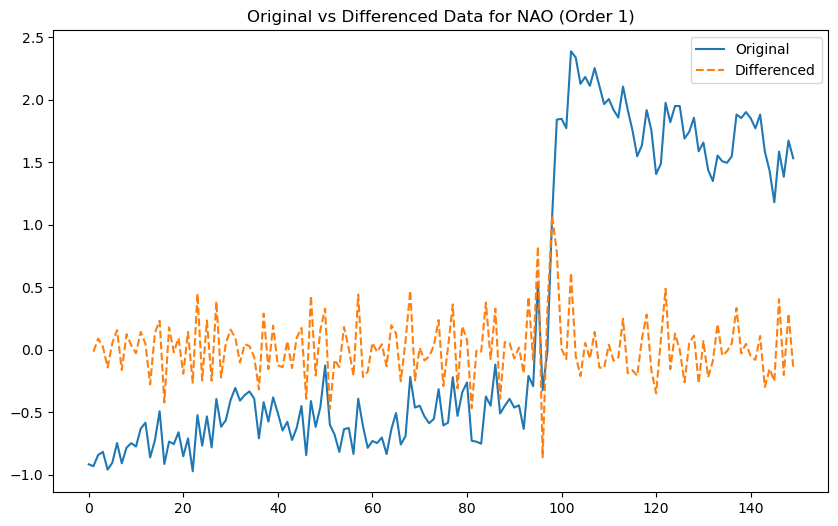

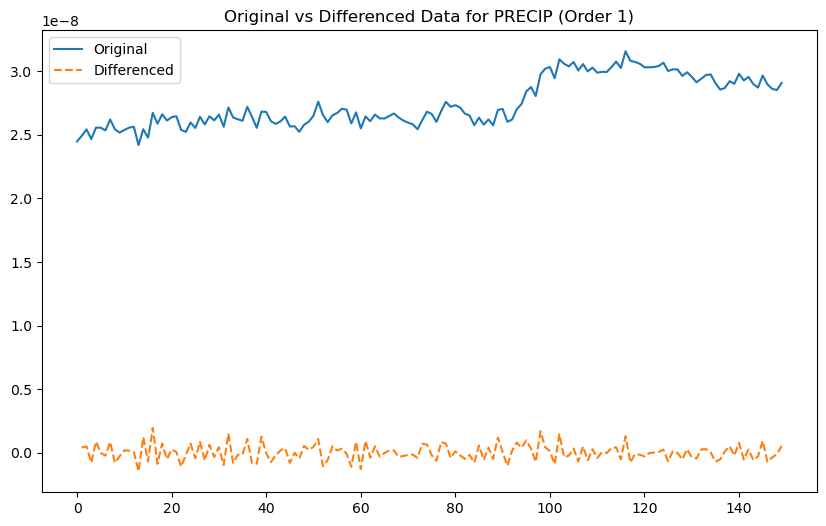

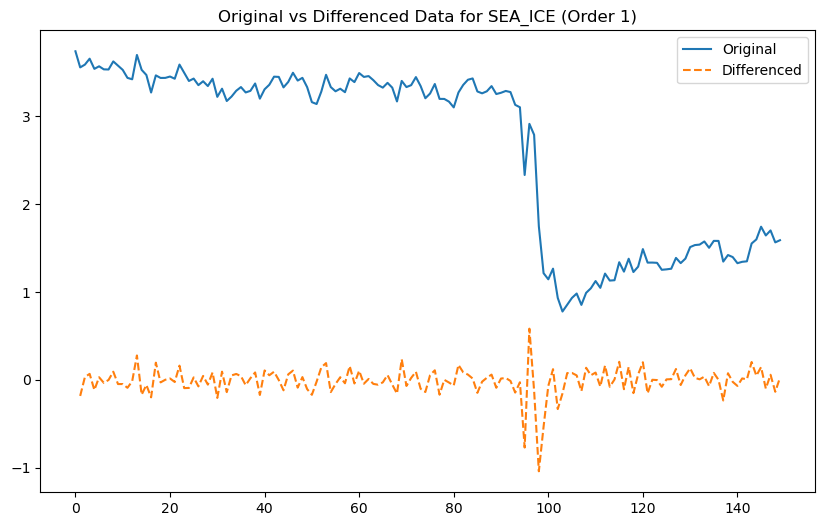

In [6]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_all_vars_warming=GC.make_stationary(df_all_vars,['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE'], test_method='ADF',plot=True)

# Save data

In [8]:
# save df_all_vars_warming to a csv file
df_all_vars_warming.to_csv('D:/VScode/Paleoclimate_causality/GC_data/df_all_vars_warming.csv')

In [9]:
# load the data from the csv file
df_all_vars_warming = pd.read_csv('D:/VScode/Paleoclimate_causality/GC_data/df_all_vars_warming.csv', index_col=0)

# Check for linearity 

In [10]:
df_all_vars_warming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     149 non-null    float64
 1   TEMP     149 non-null    float64
 2   NAO      149 non-null    float64
 3   PRECIP   149 non-null    float64
 4   SEA_ICE  149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


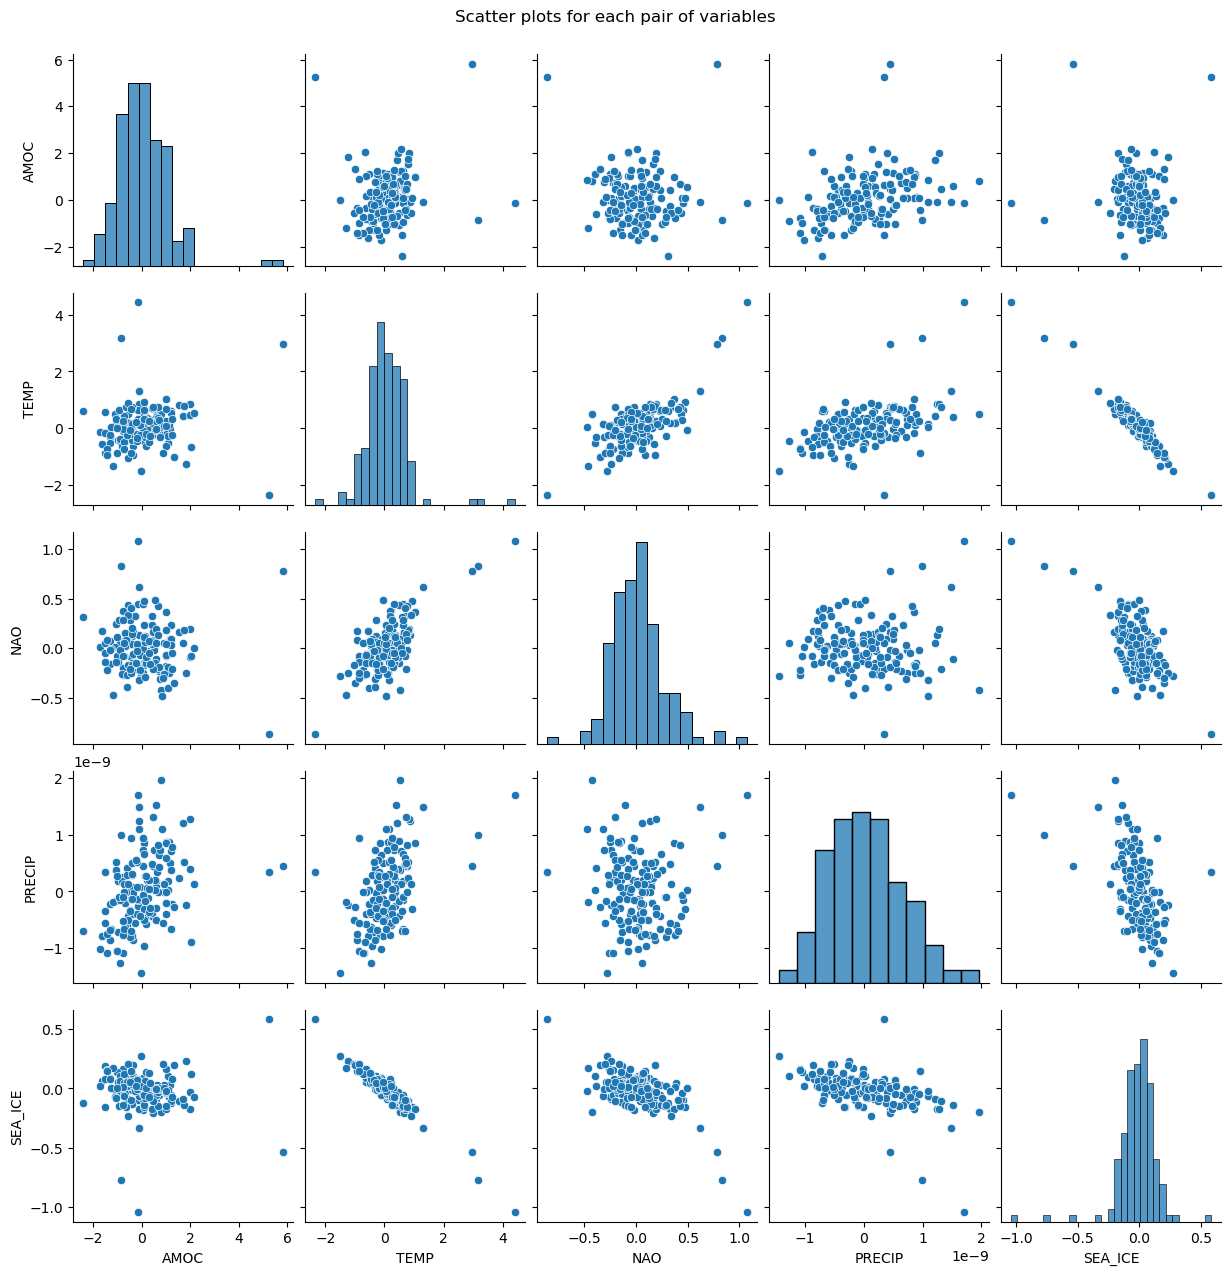

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a pairplot to visualize the scatter plot for each pair of variables
sns.pairplot(df_all_vars_warming)
plt.suptitle('Scatter plots for each pair of variables', y=1.02)
plt.show()


# Calculating the AIC

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

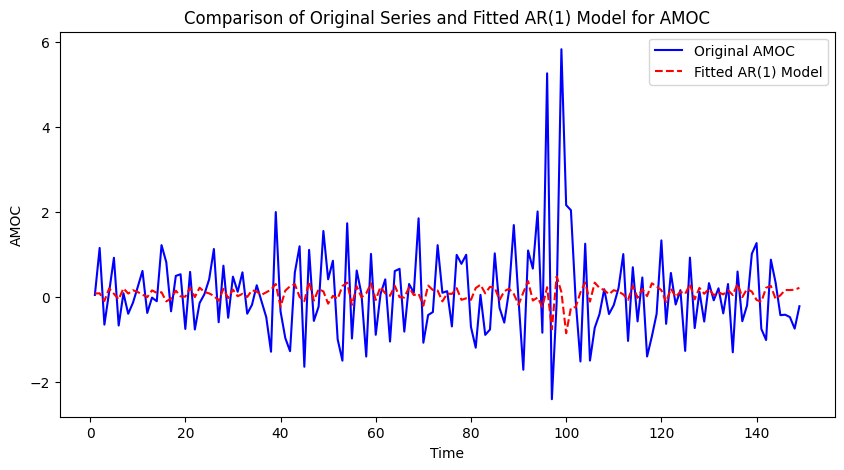

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

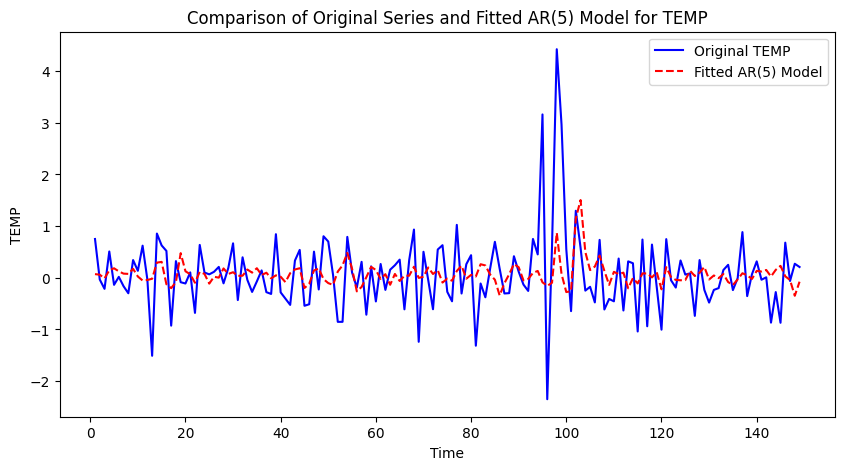

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

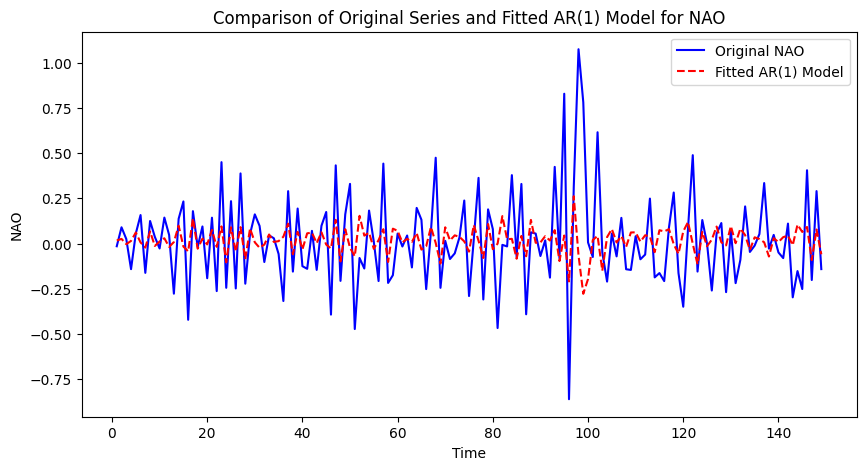

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.p

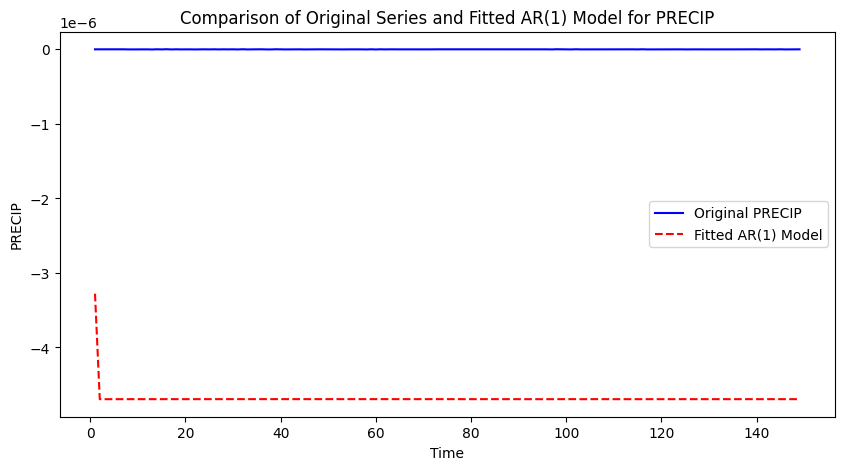

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

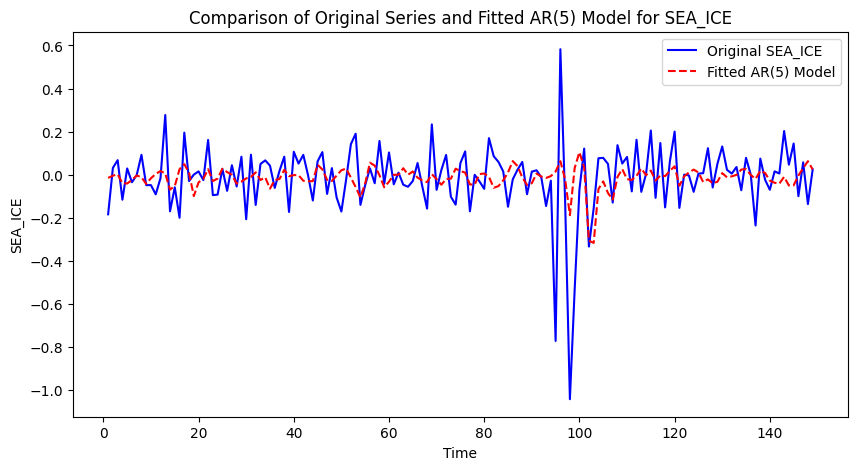

{'AMOC': {'Optimal Order': 1, 'AIC': 448.38130246848596}, 'TEMP': {'Optimal Order': 5, 'AIC': 335.107707445034}, 'NAO': {'Optimal Order': 1, 'AIC': 10.651320861866054}, 'PRECIP': {'Optimal Order': 1, 'AIC': -3197.8352003784285}, 'SEA_ICE': {'Optimal Order': 5, 'AIC': -122.22345334641875}}


In [7]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)


results = GC.find_optimal_ar_order(df_all_vars_warming, show_figures=True)
print(results)


# Save the data

In [5]:
# save the df_all_vars_warming to a csv file

df_all_vars_warming.to_csv('D:/VScode/Paleoclimate_causality/data/CCSM4/Processed/df_all_vars_warming.csv')

In [7]:
# read the data from the csv file

df_all_vars_warming = pd.read_csv('D:/VScode/Paleoclimate_causality/data/CCSM4/Processed/df_all_vars_warming.csv', index_col=0)
df_all_vars_warming

,AMOC,TEMP,NAO,PRECIP,SEA_ICE
1,0.043344,0.750598,-0.015142,4.426402e-10,-0.183688
2,1.151134,-0.034141,0.089678,5.036071e-10,0.031769
3,-0.657289,-0.214698,0.025008,-7.595967e-10,0.067559
4,0.117552,0.508742,-0.141719,8.942369e-10,-0.115844
5,0.919424,-0.137061,0.055202,-3.900283e-12,0.029125
...,...,...,...,...,...
145,-0.433674,-0.871802,-0.251563,9.513695e-10,0.144776
146,-0.423409,0.679772,0.404979,-6.958490e-10,-0.099643
147,-0.478939,-0.062757,-0.201741,-3.517894e-10,0.057346
148,-0.751095,0.270979,0.289765,-9.391439e-11,-0.136109


Testing causality between: AMOC and TEMP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    34.203               0.000                2                True
TEMP => AMOC    2.753               0.045                3                True

[{'variables': ('AMOC', 'TEMP'), 'XY': True, 'YX': True}]


c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


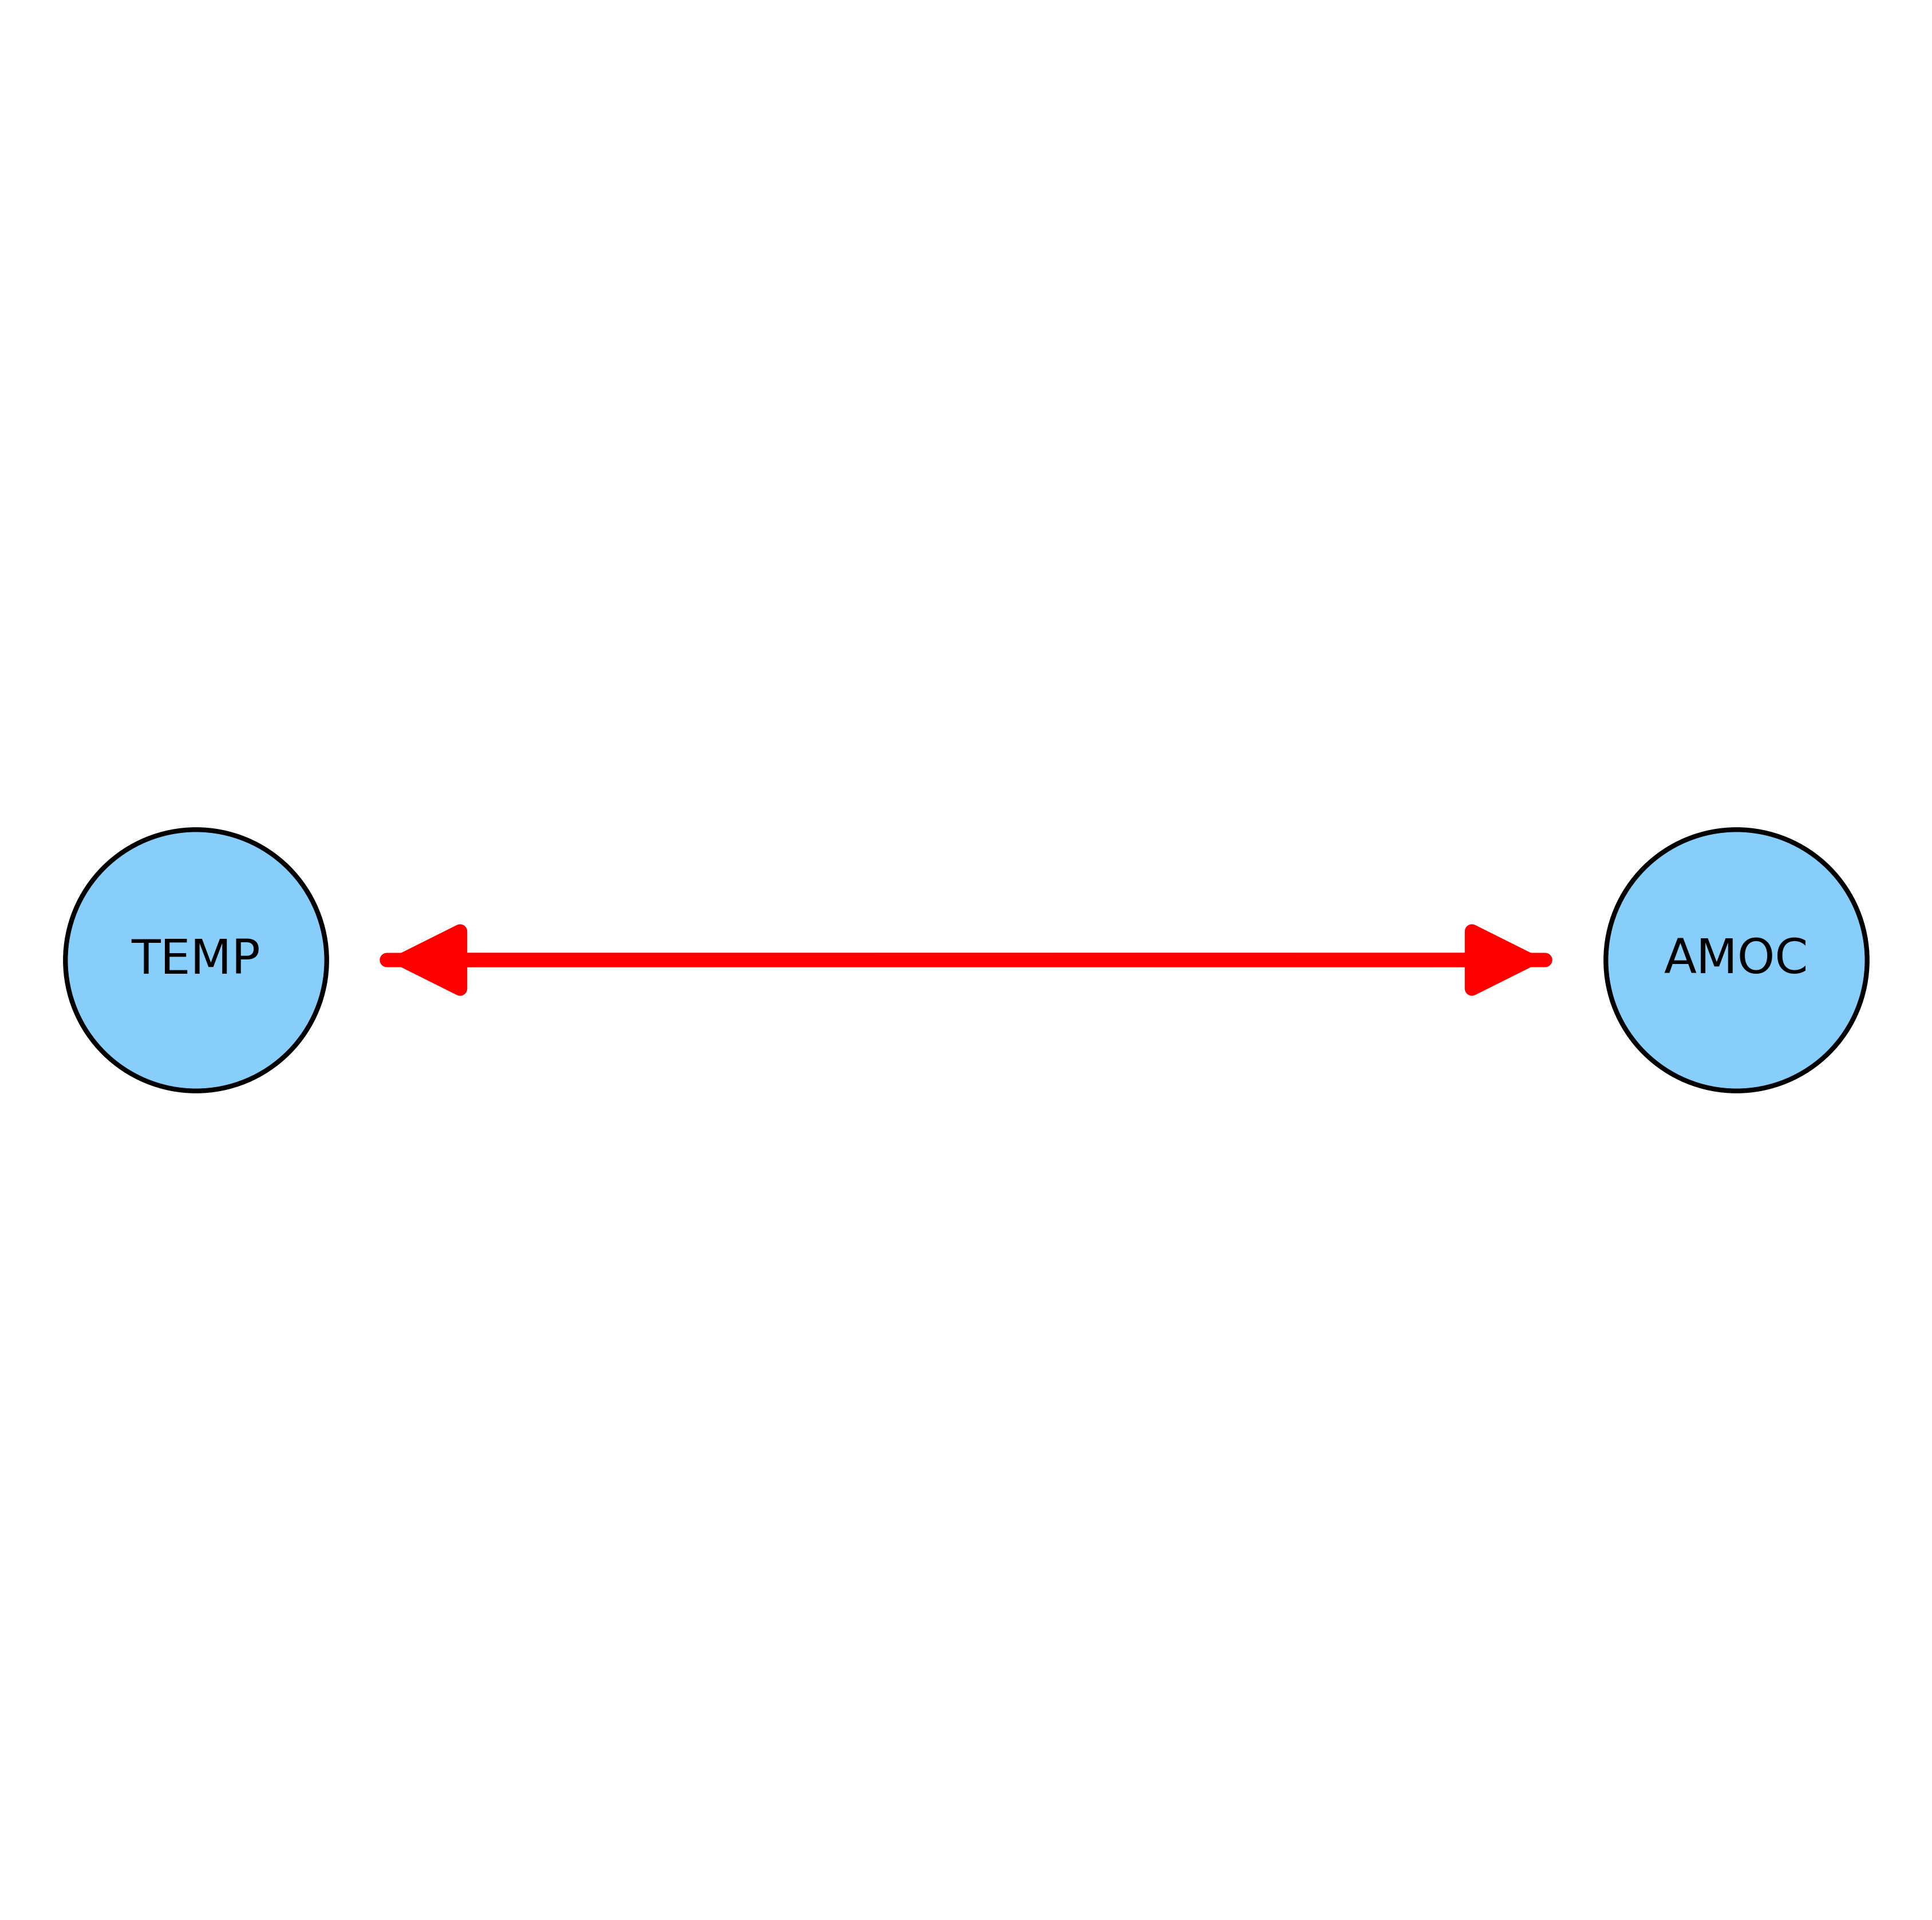

In [14]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)
# get the first two columns of the df_all_vars_warming
df_all_vars_T_AMOC_warming = df_all_vars_warming[['AMOC', 'TEMP']]
gc_results_T_AMOC_warming = GC.gc4vars(df_all_vars_T_AMOC_warming, max_lags=10)
print(gc_results_T_AMOC_warming)
GC.plot_causal_graph(gc_results_T_AMOC_warming, variables=['AMOC', 'TEMP'])
 

# Do the GC

In [11]:
gc_results_warming

[{'variables': ('AMOC', 'TEMP'), 'XY': True, 'YX': True},
 {'variables': ('AMOC', 'NAO'), 'XY': True, 'YX': True},
 {'variables': ('AMOC', 'PRECIP'), 'XY': False, 'YX': True},
 {'variables': ('AMOC', 'SEA_ICE'), 'XY': True, 'YX': True},
 {'variables': ('TEMP', 'NAO'), 'XY': False, 'YX': True},
 {'variables': ('TEMP', 'PRECIP'), 'XY': False, 'YX': True},
 {'variables': ('TEMP', 'SEA_ICE'), 'XY': False, 'YX': False},
 {'variables': ('NAO', 'PRECIP'), 'XY': False, 'YX': True},
 {'variables': ('NAO', 'SEA_ICE'), 'XY': True, 'YX': False},
 {'variables': ('PRECIP', 'SEA_ICE'), 'XY': True, 'YX': True}]

In [8]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

gc_results_warming = GC.gc4vars(df_all_vars_warming, max_lags=10)
print(gc_results_warming)


Testing causality between: AMOC and TEMP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    34.203               0.000                2                True
TEMP => AMOC    2.753               0.045                3                True

Testing causality between: AMOC and NAO
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => NAO    28.755               0.000                2                True
NAO => AMOC    3.381               0.002                8                True

Testing causality between: AMOC and PRECIP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => PRECIP    3.243          

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
TEMP => PRECIP    2.533               0.114                1                False
PRECIP => TEMP    11.250               0.001                1                True

Testing causality between: TEMP and SEA_ICE
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
TEMP => SEA_ICE    0.247               0.782                2                False
SEA_ICE => TEMP    2.221               0.138                1                False

Testing causality between: NAO and PRECIP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
NAO => PRECIP    1.759               0.076               

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site

In [7]:
# store the gc_results
import pickle
with open('gc_results_warming.pkl', 'wb') as f:
    pickle.dump(gc_results_warming, f)

In [8]:
# load the gc_results
import pickle
with open('gc_results_warming.pkl', 'rb') as f:
    gc_results_warming = pickle.load(f)

# Plot the causal graph

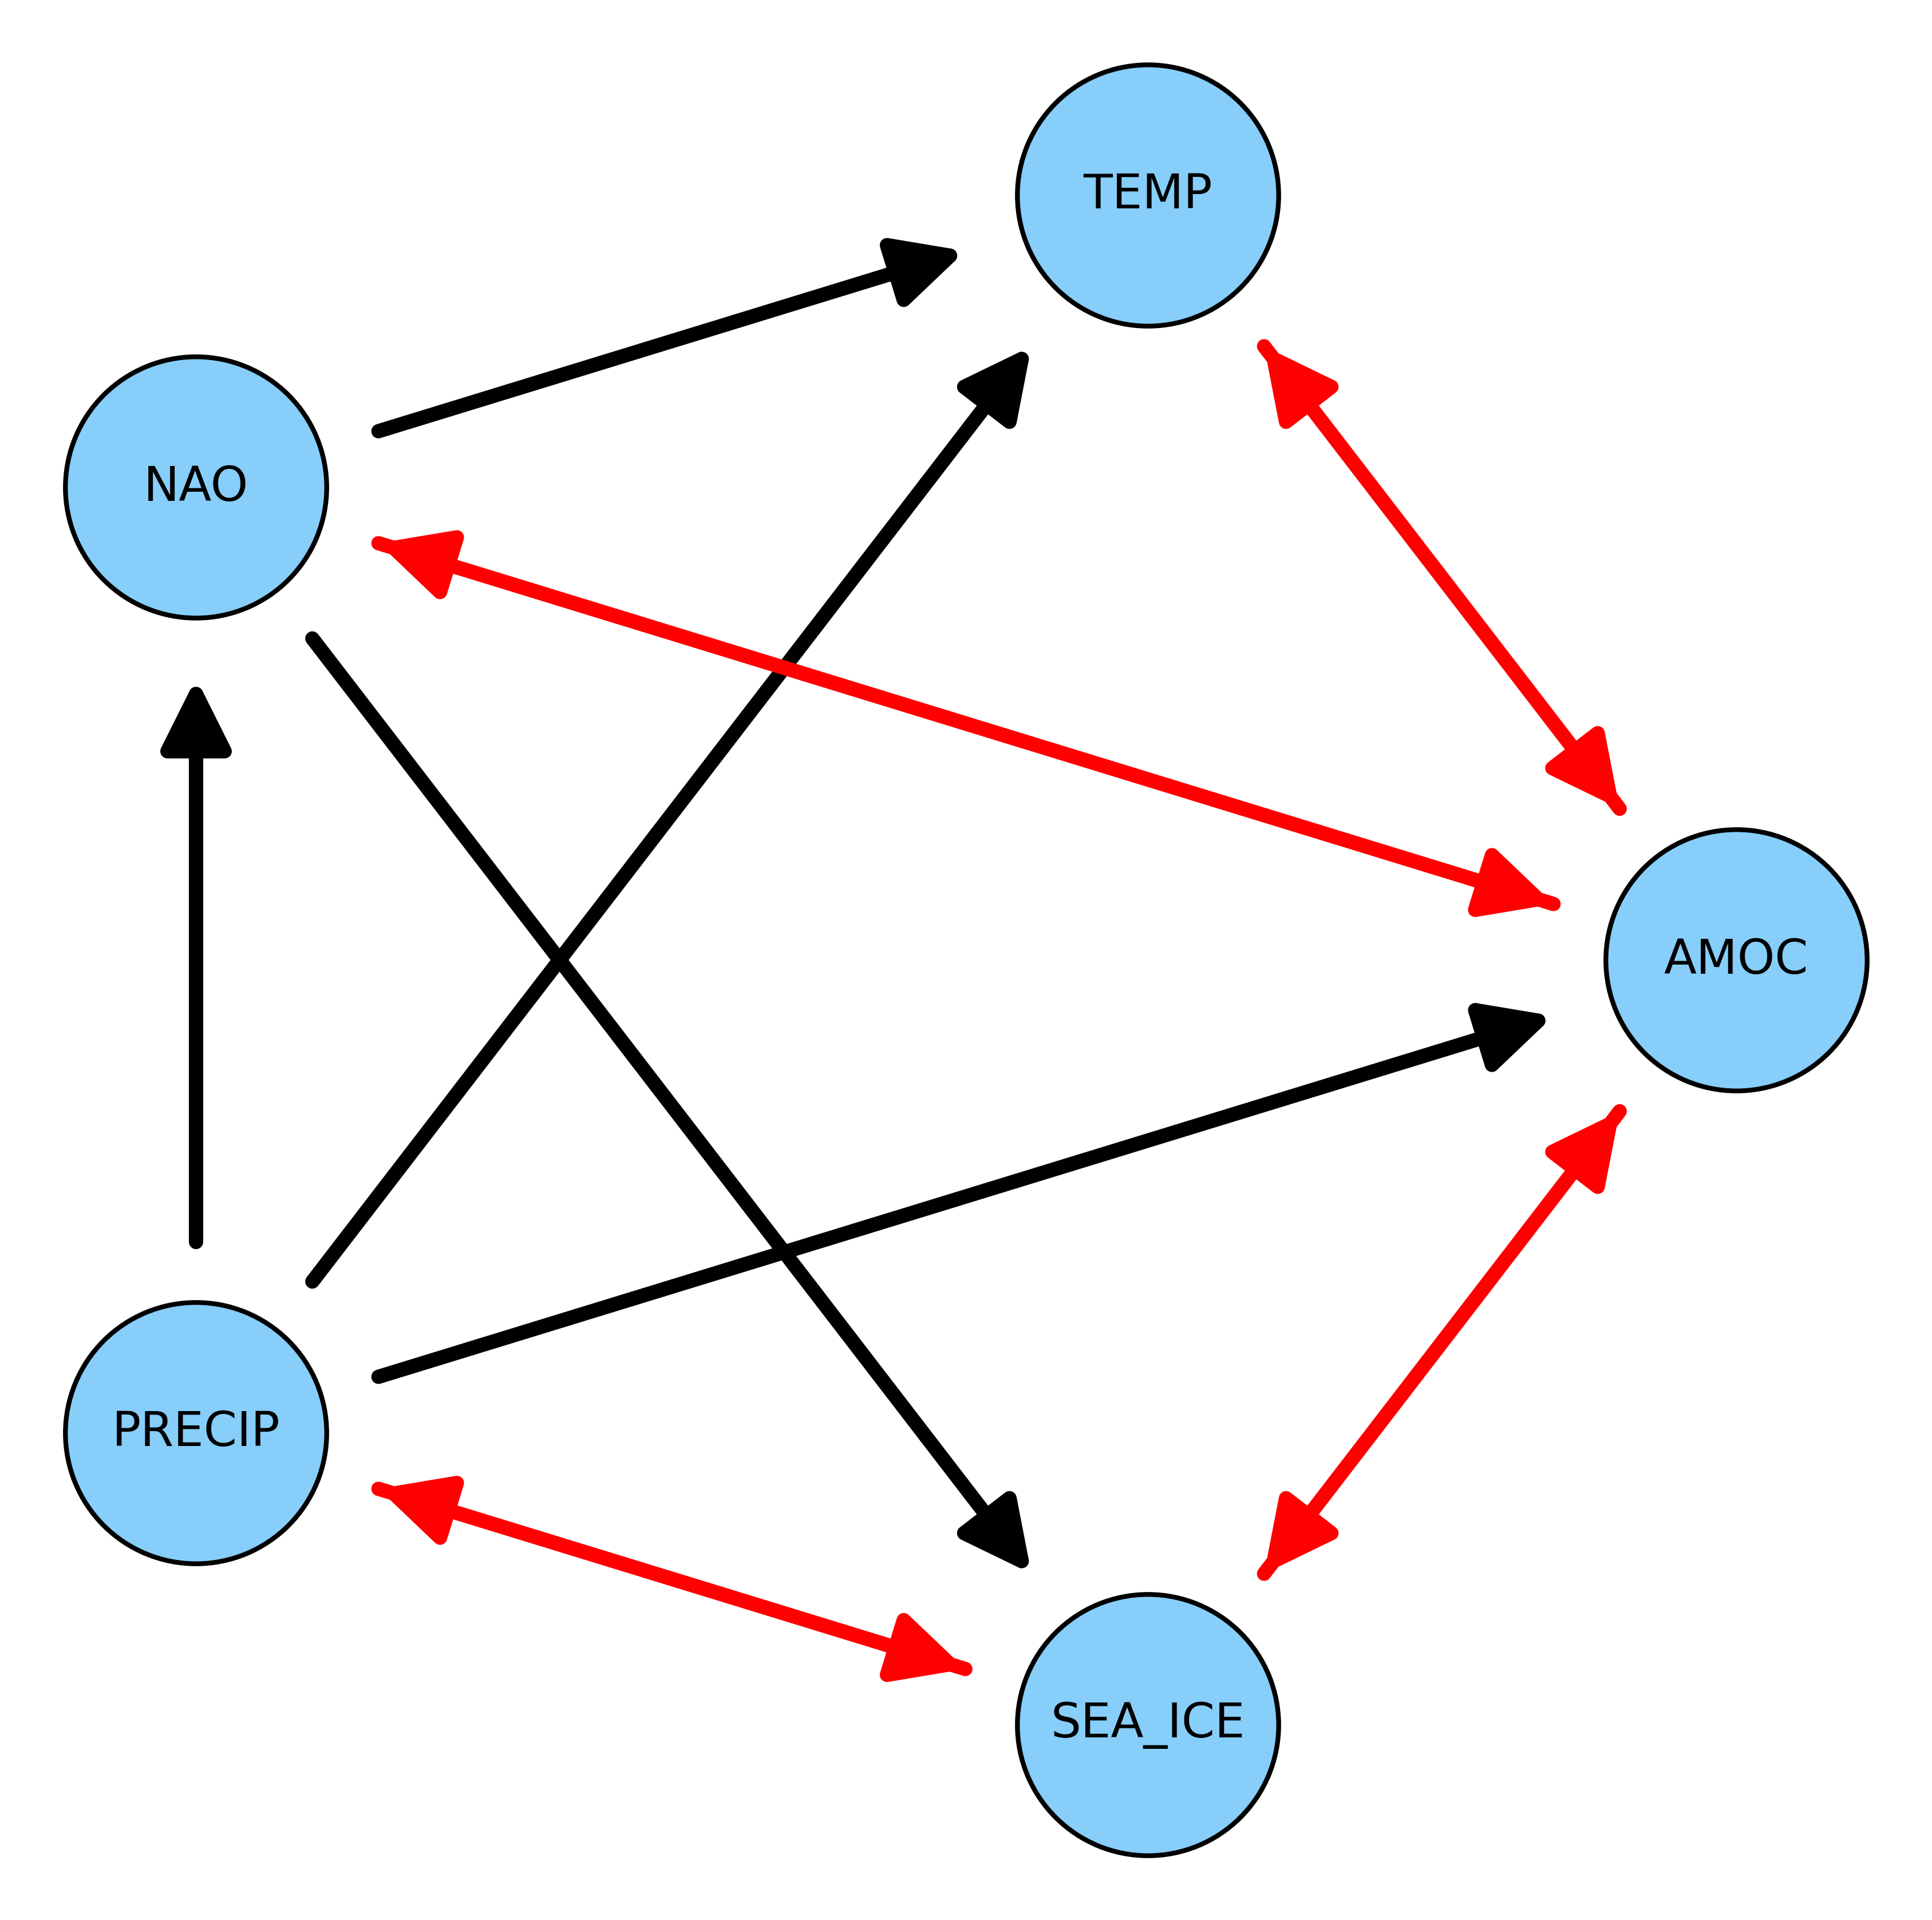

In [9]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

GC.plot_causal_graph(gc_results_warming, variables=['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE'])
 

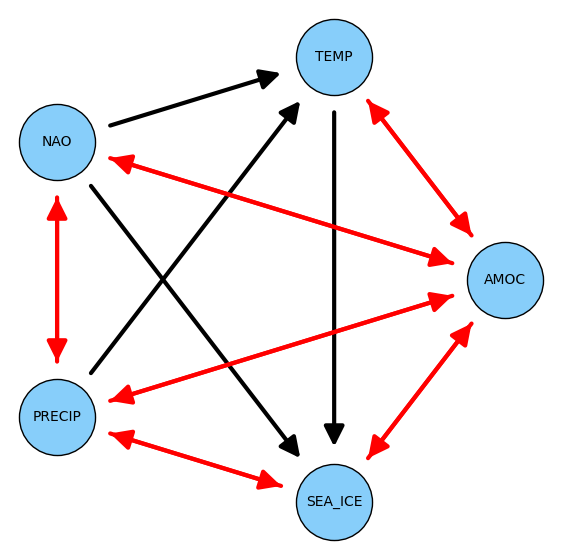

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (unique variables)
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
for var in variables:
    G.add_node(var)


# Storage for edges to draw them with specific styles later
edges_uni = []
edges_bi = []

# Iterate over the stored results to categorize edges
for result in gc_results:
    column_x, column_y = result['variables']
    if result['XY'] and result['YX']:  # If causality is bidirectional
        edges_bi.append((column_x, column_y))
        edges_bi.append((column_y, column_x))
    else:
        if result['XY']:  # If X causes Y
            edges_uni.append((column_x, column_y))
        if result['YX']:  # If Y causes X
            edges_uni.append((column_y, column_x))

for column_x, column_y in edges_uni:
    # For unidirectional edges, add them to the graph with a default color (black) and strength
    G.add_edge(column_x, column_y, strength=1, color='black')

for column_x, column_y in edges_bi:
    # For bidirectional edges, you might add them twice with different colors or just keep them black
    # This part is more about how you want to visually differentiate them
    G.add_edge(column_x, column_y, strength=1, color='red')

    
# pos = nx.spring_layout(G)  # Generate a spring layout
pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.spiral_layout(G)


plt.figure(figsize=(7, 7),dpi=100)  # Set the size of the figure

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, edgecolors='black', node_color='lightskyblue', linewidths=1, alpha=1)


# Draw the edges with a slight arc, which can create the visual effect of space
nx.draw_networkx_edges(G, pos, edgelist=edges_uni, edge_color='black', arrows=True, width=3, arrowsize=30,
                       min_source_margin=40,min_target_margin=40)  # Adjust `rad` value as needed
nx.draw_networkx_edges(G, pos, edgelist=edges_bi, edge_color='red', arrows=True, width=3, arrowsize=30,
                       min_source_margin=40,min_target_margin=40)  # Adjust `rad` value as needed

# Labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=10)

plt.axis('off')  # Turn off the axis
plt.show()  # Display the graph


In [10]:
import networkx as nx
import gravis as gv

# Create a directed graph
G = nx.DiGraph()

# Add nodes (unique variables)
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
for var in variables:
    G.add_node(var)

# Storage for edges to draw them with specific styles later
edges_uni = []
edges_bi = []

# Iterate over the stored results to categorize edges
for result in gc_results:
    column_x, column_y = result['variables']
    if result['XY'] and result['YX']:  # If causality is bidirectional
        edges_bi.append((column_x, column_y))
        edges_bi.append((column_y, column_x))
    else:
        if result['XY']:  # If X causes Y
            edges_uni.append((column_x, column_y))
        if result['YX']:  # If Y causes X
            edges_uni.append((column_y, column_x))

for column_x, column_y in edges_uni:
    # For unidirectional edges, add them to the graph with a default color (black) and strength
    G.add_edge(column_x, column_y, strength=1, color='black')

for column_x, column_y in edges_bi:
    # For bidirectional edges, you might add them twice with different colors or just keep them black
    # This part is more about how you want to visually differentiate them
    G.add_edge(column_x, column_y, strength=1, color='red')

# Use gravis to display the graph
# Assuming strength is used as edge label and you want to show it
fig = gv.d3(G, show_edge_label=False, edge_label_data_source='strength',zoom_factor=5,node_size_factor=0.7,node_label_size_factor=0.5,
            show_node_label_border=True)
fig.display()  # This should display the graph using gravis


In [28]:
import networkx as nx
import gravis as gv

edges = [
    ('A', 'B', 1, 'black'),
    ('B', 'C', 3, 'black'),
    ('B', 'D', 2, 'black'),
    ('B', 'E', 1, 'black'),
    ('C', 'D', 1, 'red'),
    ('C', 'E', 4, 'black'),
    ('D', 'A', 2, 'red'),
    ('D', 'E', 2, 'black'),
    ('E', 'F', 3, 'black'),
    ('G', 'D', 1, 'black'),
]
g = nx.DiGraph()
for source, target, strength, color in edges:
    g.add_edge(source, target, strength=strength, color=color)

fig = gv.d3(g, show_edge_label=True, edge_label_data_source='strength')
fig.display()  # opens the plot in a browser window, can be stored as SVG/JPG/PNG

# Do the GC test for the full dataset

In [ ]:
# create a new dataframes with the AMOC and TEMP data
import pandas as pd
df_test= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP})
df_test.head()

,AMOC,TEMP
0,8.355966,257.558837
1,8.399309,258.309436
2,9.550444,258.275294
3,8.893155,258.060596
4,9.010707,258.569338


In [ ]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_test_copy = GC.make_stationary(df_test, ['AMOC', 'TEMP'], plot=True)

result=GC.gc_test(df_test_copy, 'AMOC', 'TEMP', 50)

ADF Statistic: -3.709694754521928
p-value: 0.003978836932458161
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
Series in column 'AMOC' is stationary after 0 differencing operation(s).
ADF Statistic: -3.397402701871658
p-value: 0.011047732625410343
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
Series in column 'TEMP' is stationary after 0 differencing operation(s).
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    63.727               0.000                5                True
TEMP => AMOC    30.494               0.000                1                True



# Crop a DO warming event and do the GC

ADF Statistic: -1.299813680420145
p-value: 0.6292575508042038
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.


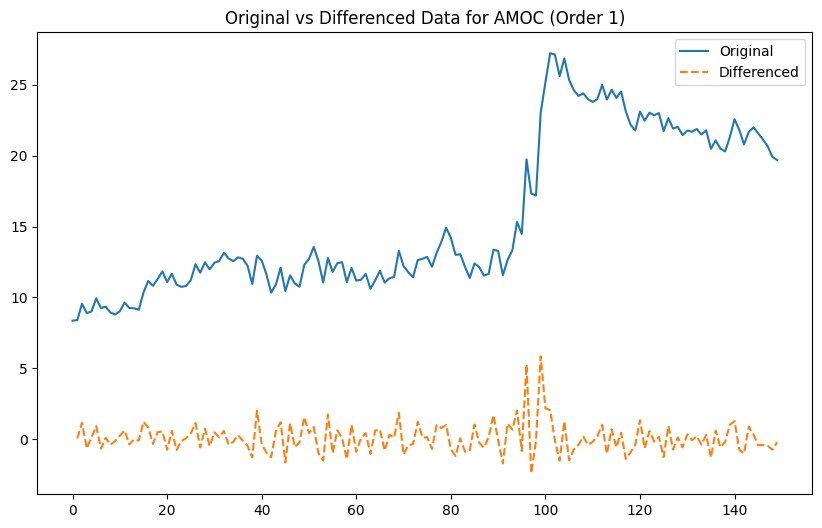

ADF Statistic: -14.249225471191762
p-value: 1.4910220399082335e-26
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is stationary.
Series in column 'AMOC' is stationary after 1 differencing operation(s).
ADF Statistic: -1.2819465955303737
p-value: 0.6373907663613377
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.


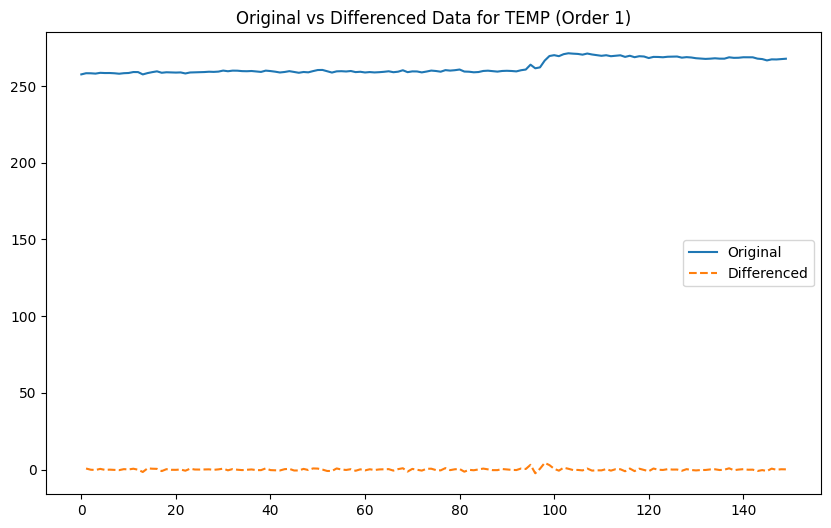

ADF Statistic: -3.7000932514399376
p-value: 0.004111842665085287
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is stationary.
Series in column 'TEMP' is stationary after 1 differencing operation(s).
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    34.203               0.000                2                True
TEMP => AMOC    2.753               0.045                3                True



In [ ]:
# crop the AMOC and TEMP data from the first 150 values and create a new dataframe
df_test_crop = df_test.iloc[:150]


import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_test_crop_copy = GC.make_stationary(df_test_crop, ['AMOC', 'TEMP'], plot=True)

result=GC.gc_test(df_test_crop_copy, 'AMOC', 'TEMP', 20)